In [3]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Step 1: Load the Data
First, we will load the data from an Excel file containing multiple sheets

In [4]:
file_path = r'C:\Users\hemch\Downloads\Grad Resume\online_retail_II.xlsx'
sheet_names = ['Year 2009-2010', 'Year 2010-2011']

In [5]:
df = pd.read_excel(file_path, sheet_name=sheet_names)

In [6]:
df1 = df["Year 2009-2010"]
df2 = df["Year 2010-2011"]

In [7]:
#checking the shape of the data
df1.shape, df2.shape

((525461, 8), (541910, 8))

In [8]:
sum([df1.shape[0], df2.shape[0]])

1067371

In [9]:
#combing the data
data = df1.append(df2)

C:\Users\hemch\AppData\Local\Temp\ipykernel_3056\3516874094.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = df1.append(df2)


In [10]:
data.head(5)

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [11]:
data.shape

(1067371, 8)

## Step 2: Data Preprocessing
Now that we have loaded the data, we will proceed with data preprocessing. This includes handling missing values, converting data types, and more.


In [12]:
data.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [13]:
data.dropna(axis = 0, subset = ["Description"], inplace = True)

In [14]:
data.isnull().sum()

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    238625
Country             0
dtype: int64

In [15]:
data[data["Customer ID"].isnull()]

Invoice StockCode                     Description  Quantity  \
263     489464     21733                    85123a mixed       -96   
283     489463     71477                           short      -240   
284     489467    85123A                     21733 mixed      -192   
577     489525    85226C       BLUE PULL BACK RACING CAR         1   
578     489525     85227     SET/6 3D KIT CARDS FOR KIDS         1   
...        ...       ...                             ...       ...   
541536  581498    85099B         JUMBO BAG RED RETROSPOT         5   
541537  581498    85099C  JUMBO  BAG BAROQUE BLACK WHITE         4   
541538  581498     85150   LADIES & GENTLEMEN METAL SIGN         1   
541539  581498     85174               S/4 CACTI CANDLES         1   
541540  581498       DOT                  DOTCOM POSTAGE         1   

               InvoiceDate    Price  Customer ID         Country  
263    2009-12-01 10:52:00     0.00          NaN  United Kingdom  
283    2009-12-01 10:52:00     0.00          NaN  United Kingdom  
284    2009-12-01 10:53:00     0.00          NaN  United Kingdom  
577    2009-12-01 11:49:00     0.55          NaN  United Kingdom  
578    2009-12-01 11:49:00     0.85          NaN  United Kingdom  
...                    ...      ...          ...             ...  
541536 2011-12-09 10:26:00     4.13          NaN  United Kingdom  
541537 2011-12-09 10:26:00     4.13          NaN  United Kingdom  
541538 2011-12-09 10:26:00     4.96          NaN  United Kingdom  
541539 2011-12-09 10:26:00    10.79          NaN  United Kingdom  
541540 2011-12-09 10:26:00  1714.17          NaN  United Kingdom  

[238625 rows x 8 columns]

In [16]:
# We have to drop the rows where customer ID is null because it's a unique customer ID of each customer
# So it's better to drop rather than imputing it with some random value

In [17]:
data.dropna(axis = 0, subset = ["Customer ID"], inplace = True)

In [18]:
data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [19]:
# Now the data has no Null values

In [20]:
data.head(10)

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
5  489434     22064           PINK DOUGHNUT TRINKET POT         24   
6  489434     21871                  SAVE THE PLANET MUG        24   
7  489434     21523   FANCY FONT HOME SWEET HOME DOORMAT        10   
8  489435     22350                            CAT BOWL         12   
9  489435     22349       DOG BOWL , CHASING BALL DESIGN        12   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
5 2009-12-01 07:45:00   1.65      13085.0  United Kingdom  
6 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
7 2009-12-01 07:45:00   5.95      13085.0  United Kingdom  
8 2009-12-01 07:46:00   2.55      13085.0  United Kingdom  
9 2009-12-01 07:46:00   3.75      13085.0  United Kingdom

## Step 3: Exploratory Data Analysis (EDA)
In this step, we will perform exploratory data analysis (EDA) to understand the data better. This involves visualizing the distributions of key variables, examining relationships between variables, and identifying any anomalies or outliers in the data.

### 1. Summary Statistics
We will start by generating summary statistics to get an overview of the data. This includes measures like mean, median, standard deviation, and percentiles.

### 2. Data Visualization
Visualizing the data helps in identifying patterns and relationships between variables. We will create:
- **Histograms** to understand the distribution of numerical variables.
- **Bar Plots** to visualize categorical variables.
- **Scatter Plots** to identify relationships between pairs of numerical variables.
- **Box Plots** to detect outliers in the data.

In [21]:
temp_df = pd.DataFrame(data["Country"].value_counts())

In [22]:
temp_df.head(10)

Country
United Kingdom   741301
Germany           17624
EIRE              16195
France            14202
Netherlands        5140
Spain              3811
Belgium            3123
Switzerland        3064
Portugal           2504
Australia          1913

In [23]:
names  = temp_df.index

In [24]:
import plotly.express as px

In [25]:
px.scatter(temp_df, y = "Country", color = names)

As you can see the **United Kingdom** has the max transcations as compared to other countries. The one here to note is that the **United Kingdom** is the dominating class in this data which making our data looks kinda imbalanced between major class and the minority class.

You can cross check the same after de-selecting the United Kingdom from the above chart and see how your axis transforms.

In [26]:
#Now let's check the total quantity and by country
data.groupby("Country").sum()["Quantity"].sort_values(ascending = False).head(10)
#data.groupby("Country").sum()["Quantity"].sort_values(ascending = False).tail(10)

Country
United Kingdom    8353502
Netherlands        381951
EIRE               313373
Denmark            235218
Germany            224581
France             183339
Australia          103706
Sweden              87737
Switzerland         51831
Spain               45156
Name: Quantity, dtype: int64

In [27]:
#checking for the average price by country

px.scatter(data.iloc[:, [5, 7]].groupby(["Country"]).mean(), 
           y = "Price", size = "Price", title = "Average Price by Country", opacity = 0.48)


From the above dot plot we can conclude that the Singapore has the highest averge price followed by the Norway and Malta. Let's go deeper and see the distribution to better understand about our data.

In [28]:
#extracting unique country names
countries = data["Country"].unique()
print(countries)

['United Kingdom' 'France' 'USA' 'Belgium' 'Australia' 'EIRE' 'Germany'
 'Portugal' 'Japan' 'Denmark' 'Netherlands' 'Poland' 'Spain'
 'Channel Islands' 'Italy' 'Cyprus' 'Greece' 'Norway' 'Austria' 'Sweden'
 'United Arab Emirates' 'Finland' 'Switzerland' 'Unspecified' 'Nigeria'
 'Malta' 'RSA' 'Singapore' 'Bahrain' 'Thailand' 'Israel' 'Lithuania'
 'West Indies' 'Korea' 'Brazil' 'Canada' 'Iceland' 'Lebanon'
 'Saudi Arabia' 'Czech Republic' 'European Community']


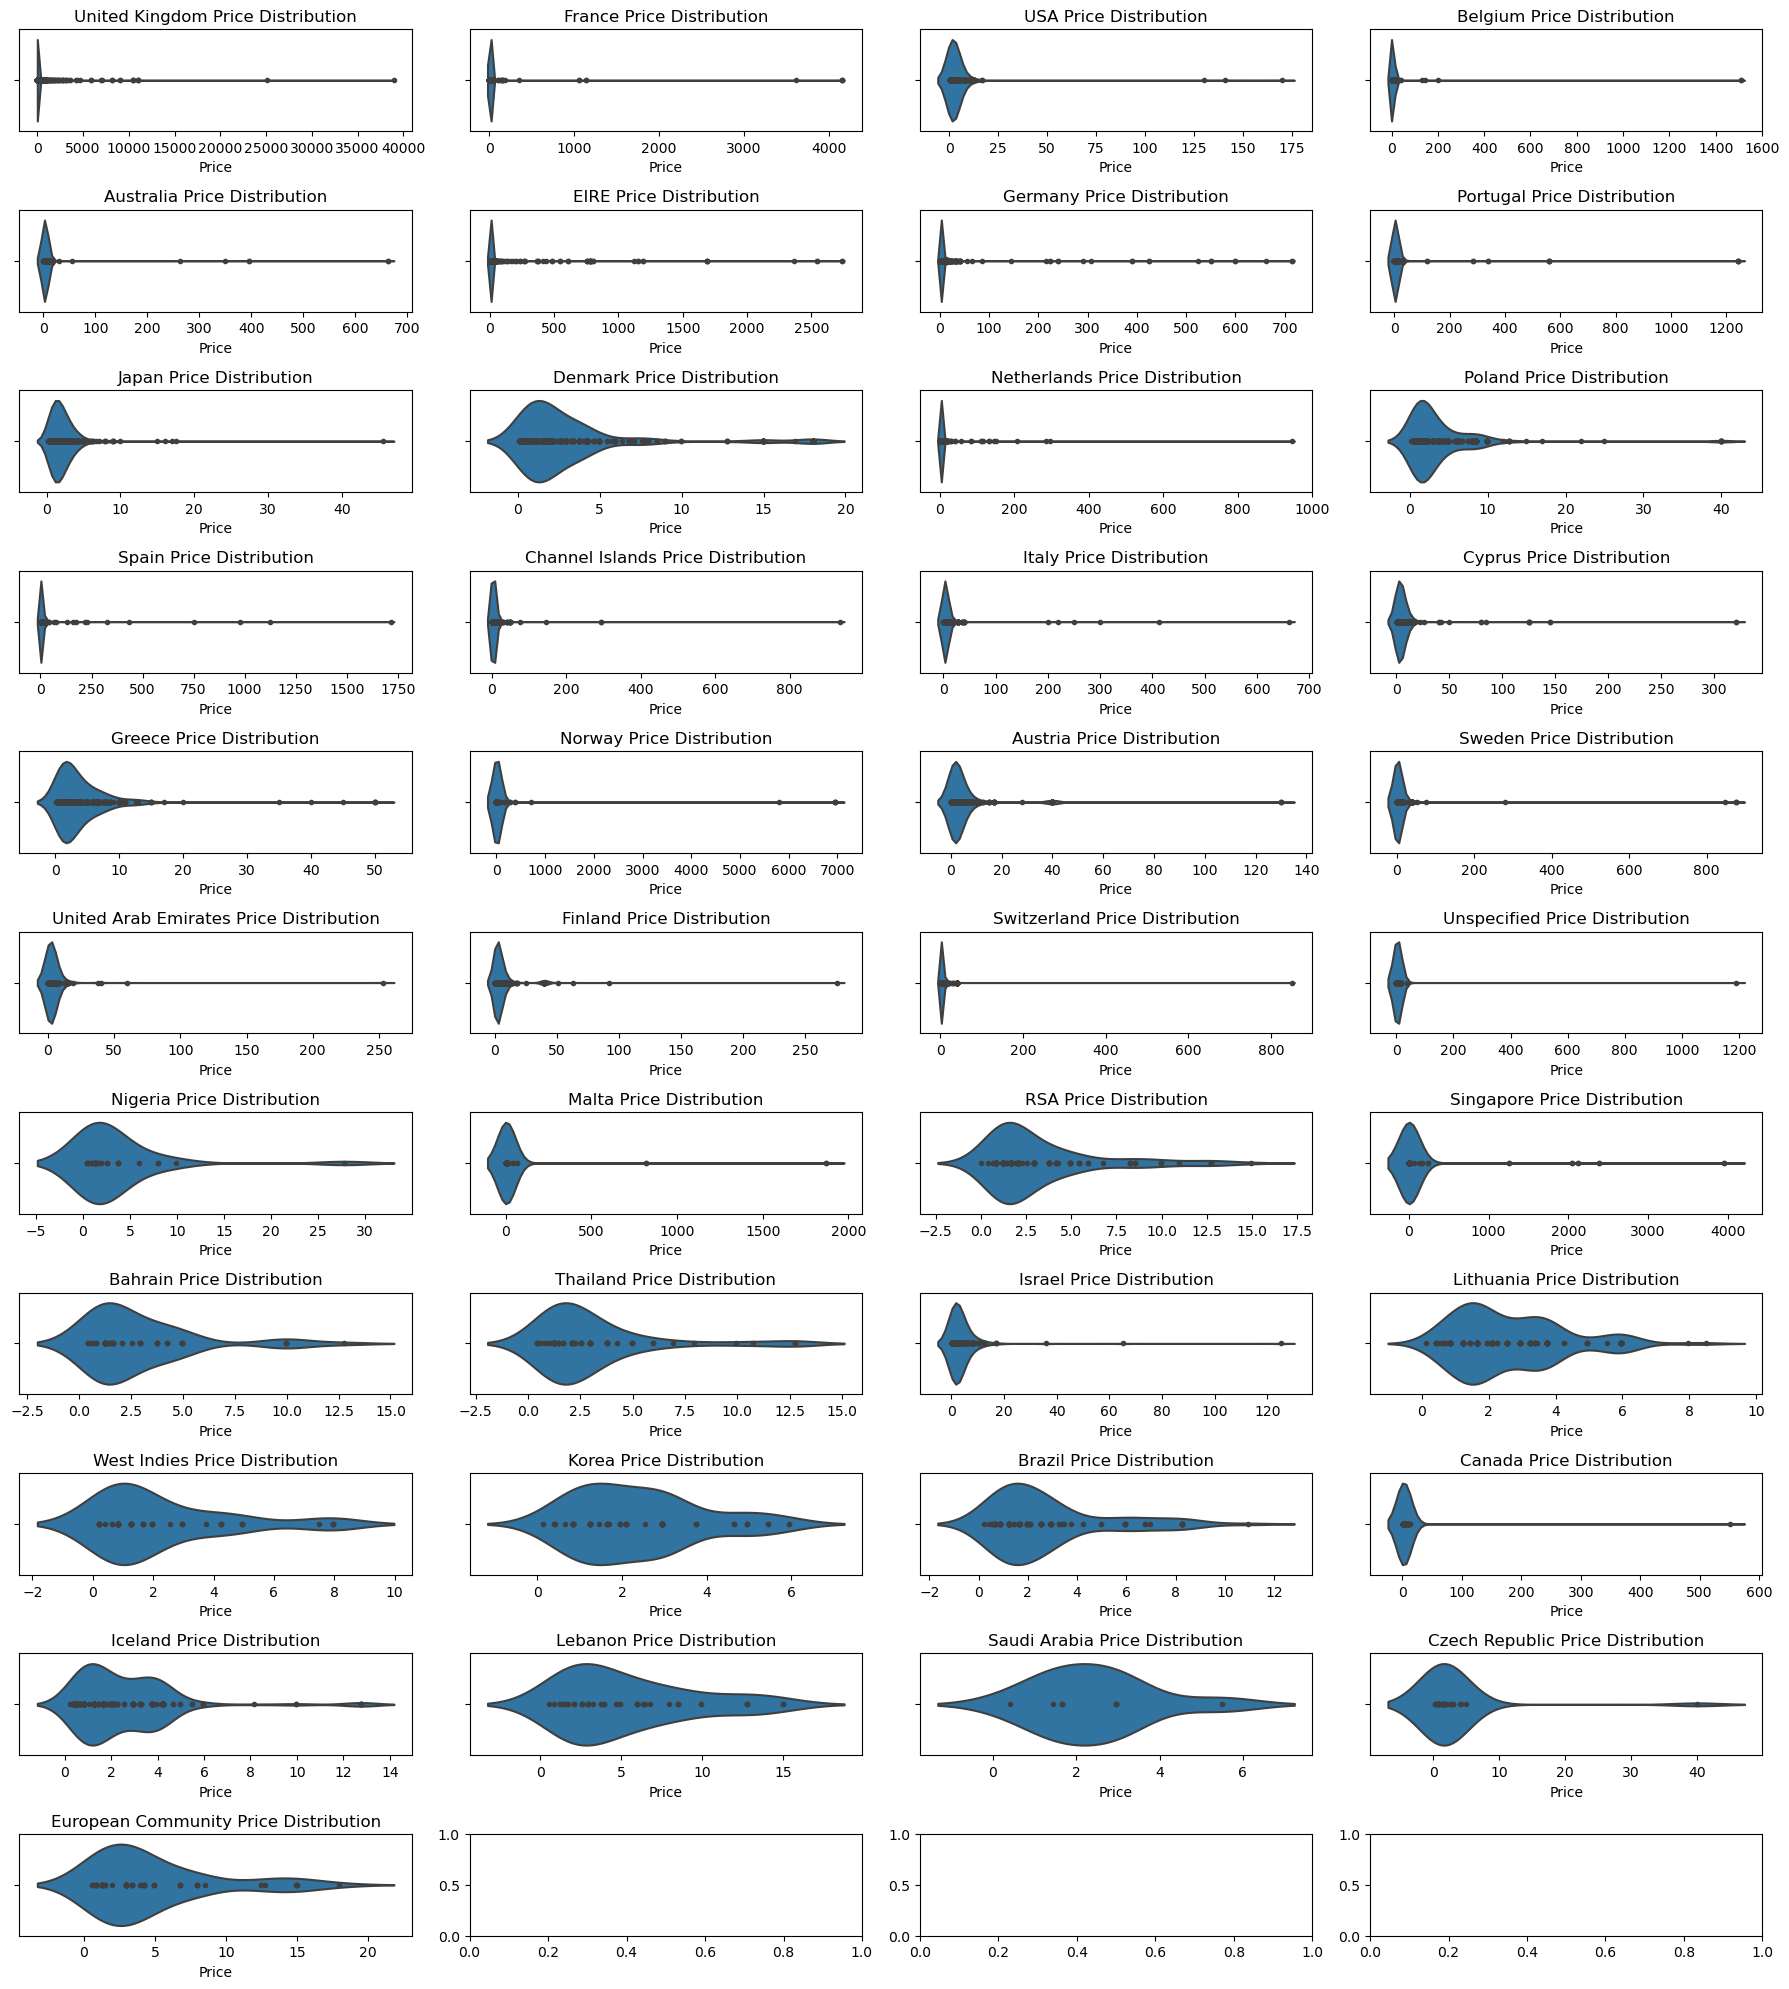

In [29]:
#plotting the violin plot for the data
fig, ax = plt.subplots(11, 4, figsize=(18,20))
axes_ = [axes_row for axes in ax for axes_row in axes]

for i, c in enumerate(countries):
    sns.violinplot(x = "Price", data = data[data["Country"] == c], ax = axes_[i], inner = "point")
    axes_[i].set_title(c + ' ' + "Price Distribution")
    plt.tight_layout()

From the above plot what I can interpret is that most of the data is pretty skewed and there is lot's of high extreme values that are present in the data.

In [30]:
temp_invoice_df = data.groupby("Invoice").sum()

In [31]:
temp_invoice_df.reset_index(inplace = True)

In [32]:
temp_invoice_df.sort_values(by = "Quantity", ascending = False).head(10).iloc[:,:2].style.background_gradient(cmap = "Blues")

In [33]:
data[(data["Invoice"] == 489444) | (data["Invoice"] == 489447)]

Invoice StockCode Description  Quantity         InvoiceDate  Price  \
126  489444      POST     POSTAGE         1 2009-12-01 09:55:00  141.0   
173  489447      POST     POSTAGE         1 2009-12-01 10:10:00  130.0   

     Customer ID  Country  
126      12636.0      USA  
173      12362.0  Belgium

As you can see above, These 2 invoices with invoice number **489444** and **489447** had only single transaction, that's why the average price was too high

***EDA INSIGHTS***
1. Most of the customers are from the United Kingdom followed by the Germany, EIRE & France.

2. If we check the average price sale by countries, what we have observed is that Singapore has the highest averge price sale followed by the Norway and Malta.

3. Most of the countries data is skewed when it comes to the Price feature with lots of higher extreme values.

4. There are total 44876 uniques purchased happend so far.

5. We have also observed some of the Invoices who have purchased most of the quantities within 2 year of span.

6. When it comes to the average spend there are 2 invoices with number 489444 and 489447 having the highest average spent but upon inspection we also found the average product purchase was only 1 which is from USA followed by Belgium.

<AxesSubplot:xlabel='Description'>

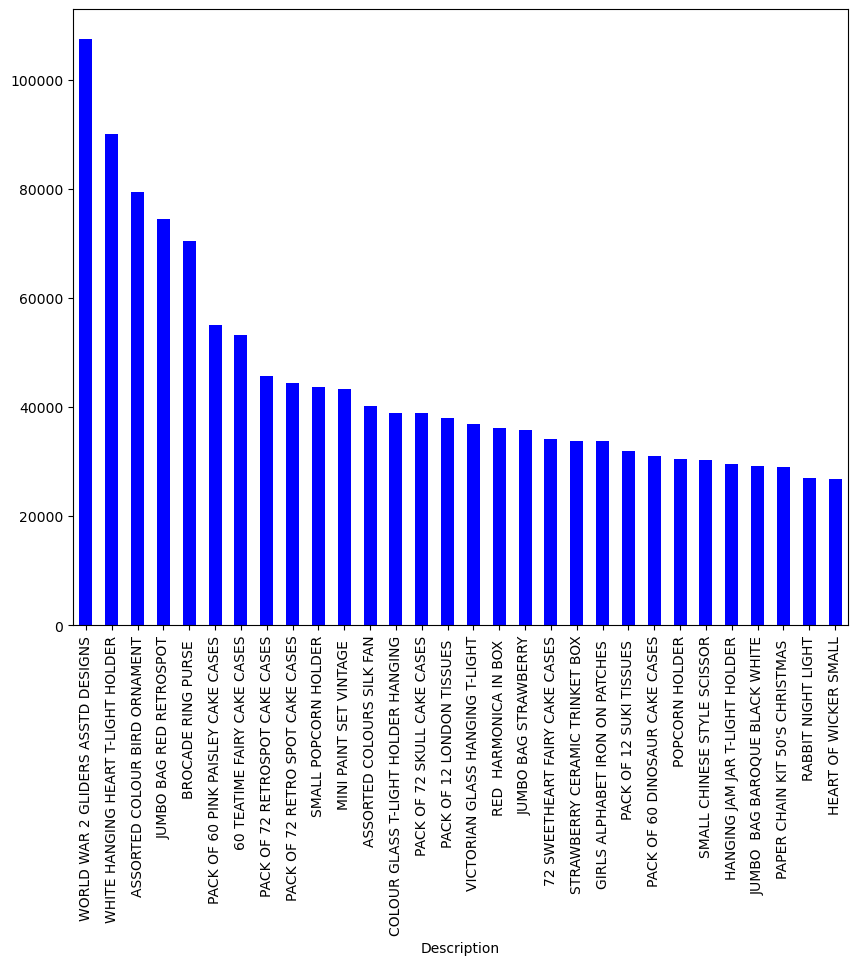

In [34]:
plt.figure(figsize=(10,8))
data.groupby("Description").sum().sort_values(by = "Quantity", ascending = False).head(30)["Quantity"].plot(kind = "bar", color = 'blue')

In [35]:
#Date Time Analysis
import datetime

In [36]:
temp_data = data.copy()

In [37]:
temp_data

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
541905  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
541909  581587      POST                              POSTAGE         1   

               InvoiceDate  Price  Customer ID         Country  
0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
...                    ...    ...          ...             ...  
541905 2011-12-09 12:50:00   2.10      12680.0          France  
541906 2011-12-09 12:50:00   4.15      12680.0          France  
541907 2011-12-09 12:50:00   4.15      12680.0          France  
541908 2011-12-09 12:50:00   4.95      12680.0          France  
541909 2011-12-09 12:50:00  18.00      12680.0          France  

[824364 rows x 8 columns]

In [38]:
temp_data.loc[:, "Month"] = data.InvoiceDate.dt.month
temp_data.loc[:, "Time"] = data.InvoiceDate.dt.time
temp_data.loc[:, "Year"] = data.InvoiceDate.dt.year
temp_data.loc[:, "Day"] = data.InvoiceDate.dt.day
temp_data.loc[:, "Quarter"] = data.InvoiceDate.dt.quarter
temp_data.loc[:, "Day of Week"] = data.InvoiceDate.dt.dayofweek

In [39]:
dayofweek_mapping = dict({0: "Monday", 
                         1: "Tuesday", 
                         2: "Wednesday" , 
                         3: "Thursday", 
                         4: "Friday", 
                         5: "Saturday", 
                         6: "Sunday"})

In [40]:
temp_data["Day of Week"] = temp_data["Day of Week"].map(dayofweek_mapping)

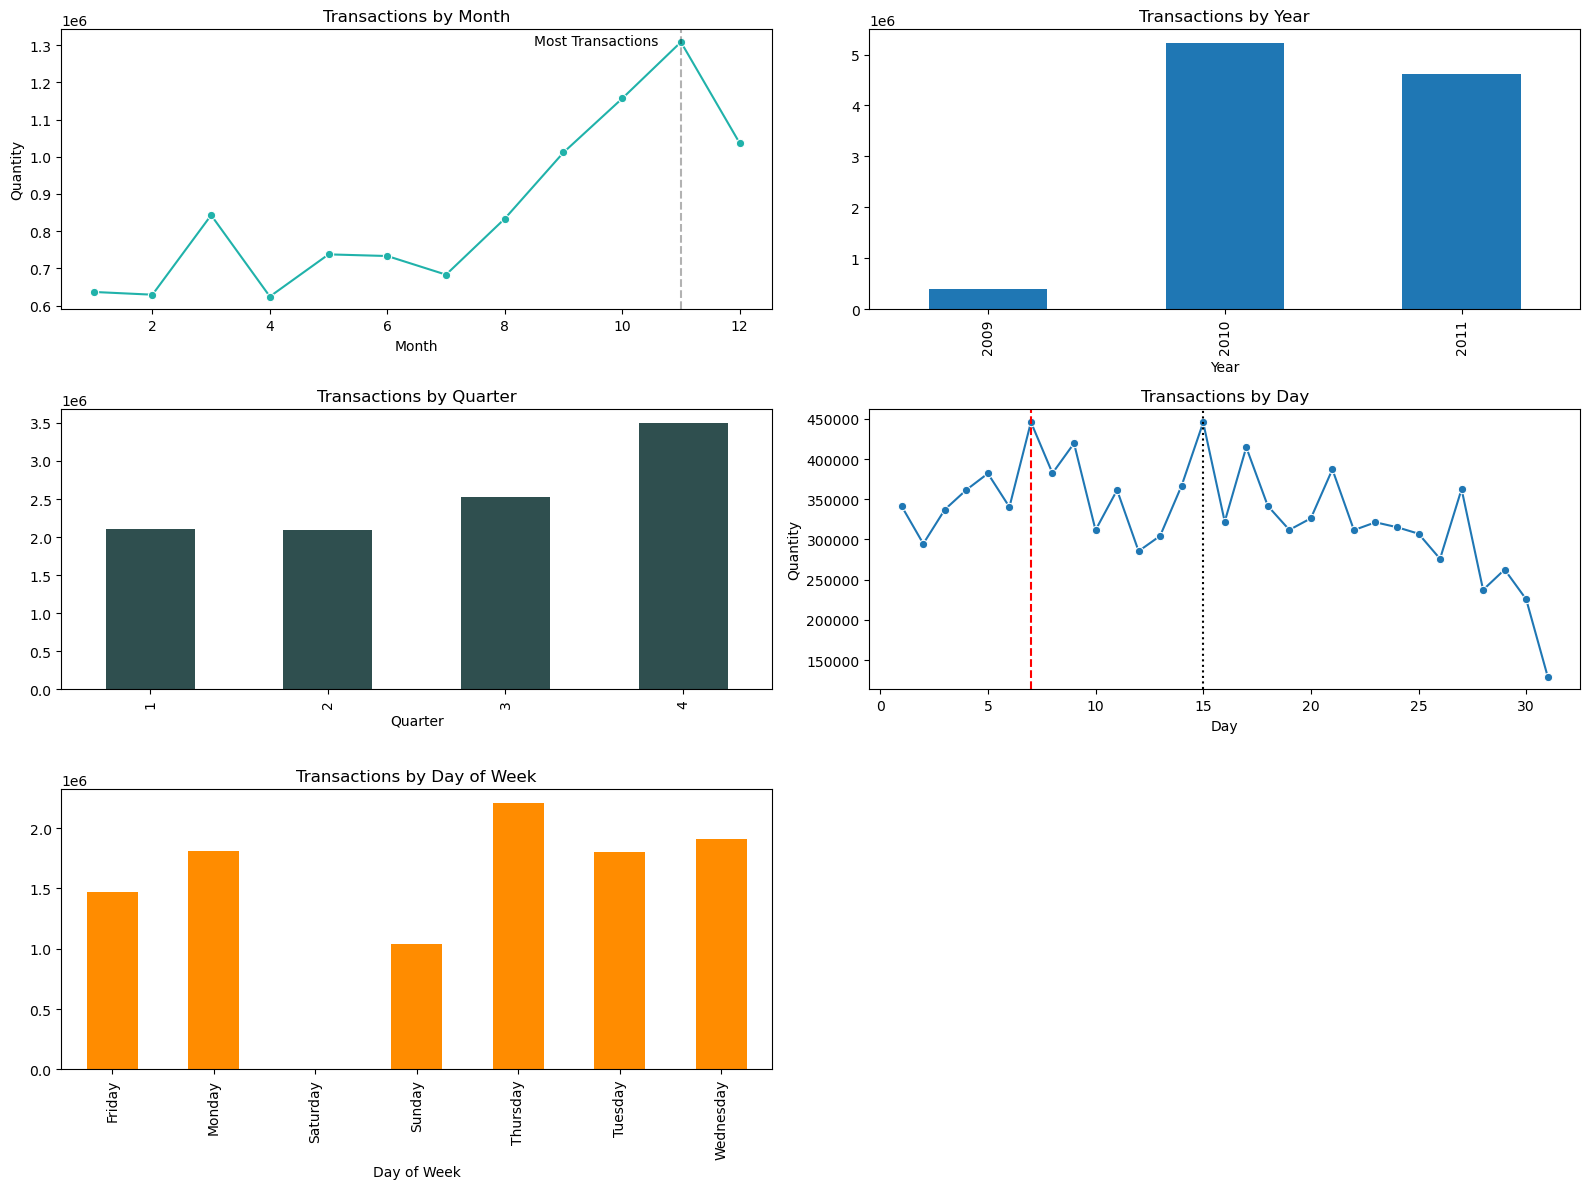

In [41]:
plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
sns.lineplot(x = "Month", y = "Quantity", data = temp_data.groupby("Month").sum("Quantity"), marker = "o", color = "lightseagreen")
plt.axvline(11, color = "k", linestyle = '--', alpha = 0.3)
plt.text(8.50, 1.3e6, "Most Transactions")
plt.title("Transactions by Month")
plt.subplot(3,2,2)
temp_data.groupby("Year").sum()["Quantity"].plot(kind = "bar")
plt.title("Transactions by Year")
plt.subplot(3,2,3)
temp_data.groupby("Quarter").sum()["Quantity"].plot(kind = "bar", color = "darkslategrey")
plt.title("Transactions by Quarter")
plt.subplot(3,2,4)
sns.lineplot(x = "Day", y = "Quantity", data = temp_data.groupby("Day").sum("Quantity"), marker = "o", )
plt.axvline(7, color = 'r', linestyle = '--')
plt.axvline(15, color = 'k', linestyle = "dotted")
plt.title("Transactions by Day")
plt.subplot(3,2,5)
temp_data.groupby("Day of Week").sum()["Quantity"].plot(kind = "bar", color = "darkorange")
plt.title("Transactions by Day of Week")
plt.tight_layout()
plt.show()

As we can see, in 2009 the transactions is quite low as compared to 2010 and 2011. But as if now, we don't know the reason behind this so let's investigate why 2009 is low as compared to other 2 years.

### Top Countries and  Popular Products

In [42]:
print("Total Number of Countries in 2009: {}".format(len(temp_data[temp_data["Year"] == 2009]["Country"].unique())))
print("Total Number of Transactions in 2009: {}".format(temp_data[temp_data["Year"] == 2009]["Quantity"].sum()))
print("--------------------------------------------")
print("Total Number of Countries in 2009: {}".format(len(temp_data[temp_data["Year"] == 2010]["Country"].unique())))
print("Total Number of Transactions in 2009: {}".format(temp_data[temp_data["Year"] == 2010]["Quantity"].sum()))
print("--------------------------------------------")
print("Total Number of Countries in 2009: {}".format(len(temp_data[temp_data["Year"] == 2011]["Country"].unique())))
print("Total Number of Transactions in 2009: {}".format(temp_data[temp_data["Year"] == 2011]["Quantity"].sum()))

Total Number of Countries in 2009: 23
Total Number of Transactions in 2009: 390286
--------------------------------------------
Total Number of Countries in 2009: 37
Total Number of Transactions in 2009: 5233315
--------------------------------------------
Total Number of Countries in 2009: 36
Total Number of Transactions in 2009: 4610527


In [43]:
top_8_countries = ["United Kingdom", "Netherlands", "EIRE", "Denmark", "Germany", "France", "Australia", "Sweden"]

In [44]:
_2009 = temp_data[temp_data["Year"] == 2009]["Country"].unique()
_2010 = temp_data[temp_data["Year"] == 2010]["Country"].unique()
_2011 = temp_data[temp_data["Year"] == 2011]["Country"].unique()

In [45]:
#checking for the countries which are available in  2010 and 2011 but not in 2009.
no_cols = []

for i in (_2010):
    if i not in _2009:
        no_cols.append(i)
print("These are the values which are not present in 2009: {}".format(no_cols))

These are the values which are not present in 2009: ['Unspecified', 'Nigeria', 'Malta', 'RSA', 'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland']


In [46]:
temp = data.groupby(["Country", "Description"]).sum()["Quantity"]

temp = pd.DataFrame(temp)

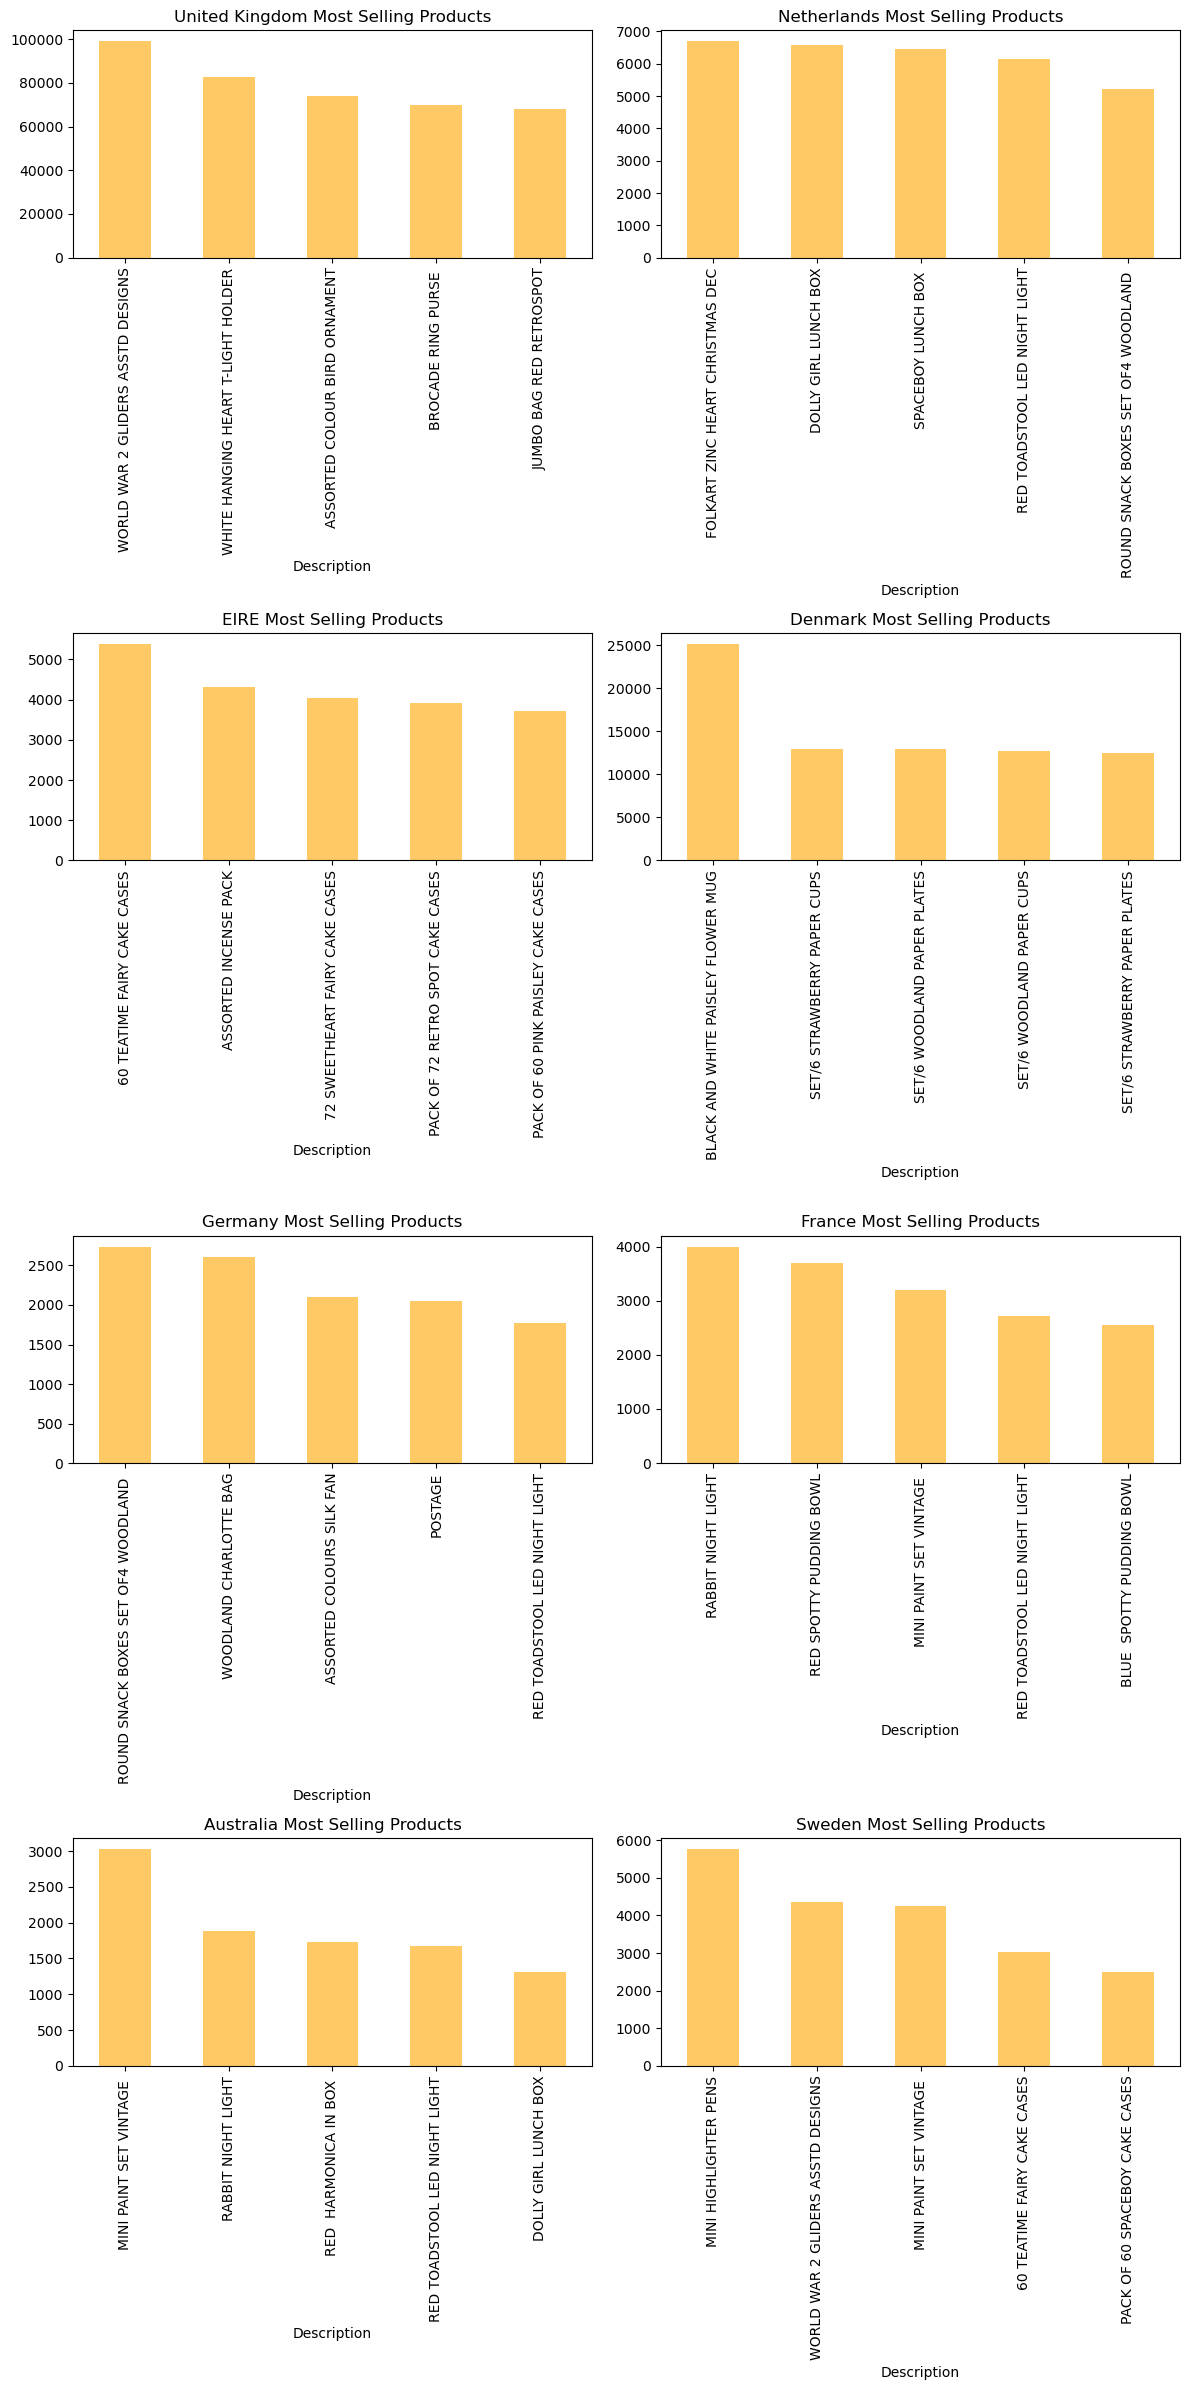

In [47]:
x = 1
plt.figure(figsize=(12,24))
for x, c in enumerate(top_8_countries):
    ax = plt.subplot(4,2, x+1)
    plt.title(c + ' '+ "Most Selling Products")
    temp.loc[c].sort_values(by = "Quantity", ascending = False)["Quantity"].head(5).plot(kind = "bar", ax = ax, color = "orange", alpha = 0.6)
    plt.tight_layout()

***EDA INSIGHTS:***
1. Our Top 5 Best Selling Products are World War 2 Gliders, White Hanging Heart, Assorted Colour Bird, Jumbo Bag Red, Brocade Ring.

2. Most Transactions happened in the month of Novemeber which is evident due to festive seasons.

3. 2010 is the year in which we have the most transactions followed by the 2011

4. Q4 being the highest when it comes transactions.

5. It also observed that in the end of the 1st week and starting of the 3rd week, people tends to buy more.

6. People loves to shop on Thursday followed by Tuesday and Wednesday.

### RFM Estimation - (Recency, Frequency, Monetary)
Step 3: Feature Engineering

In [48]:
data.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [49]:
data["Total Amount"] = data["Quantity"]*data["Price"]

In [50]:
data.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  Total Amount  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom          83.4  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom          81.0  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom          81.0  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom         100.8  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom          30.0

In [51]:
data.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Total Amount'],
      dtype='object')

In [52]:
reference_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)

In [53]:
rfm = data.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'Invoice': 'nunique',
    'Total Amount': 'sum'
}).reset_index()


In [54]:
rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

In [55]:
rfm.head()

Customer ID  Recency  Frequency  Monetary
0      12346.0      326         17    -64.68
1      12347.0        2          8   5633.32
2      12348.0       75          5   2019.40
3      12349.0       19          5   4404.54
4      12350.0      310          1    334.40

In [56]:
rfm.shape

(5942, 4)

C:\Users\hemch\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\hemch\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\hemch\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



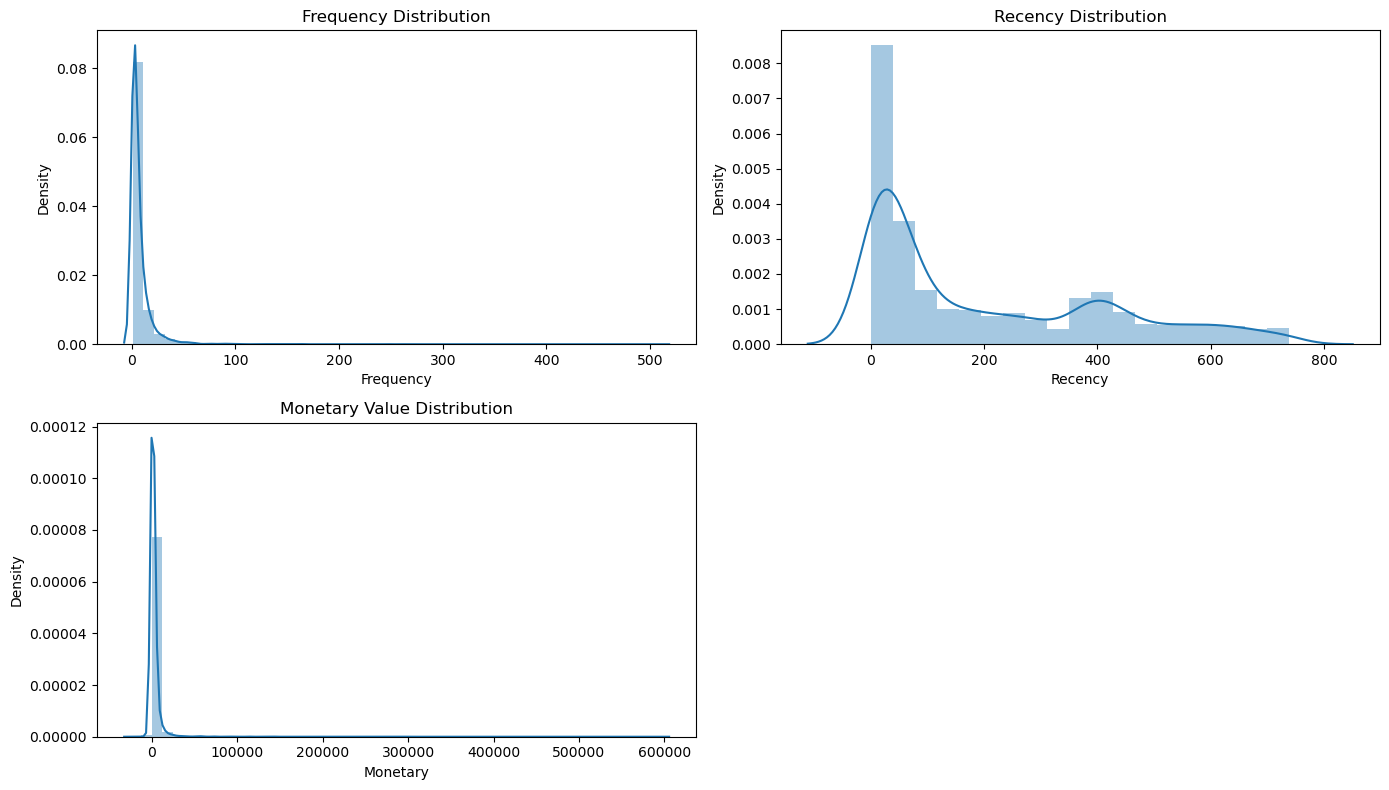

In [57]:
#plotting the distribution
plt.figure(figsize=(14,8))
plt.subplot(221)
sns.distplot(rfm["Frequency"])
plt.title("Frequency Distribution")
plt.subplot(222)
sns.distplot(rfm["Recency"])
plt.title("Recency Distribution")
plt.subplot(223)
sns.distplot(rfm["Monetary"])
plt.title("Monetary Value Distribution")
plt.tight_layout()

C:\Users\hemch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\hemch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\hemch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



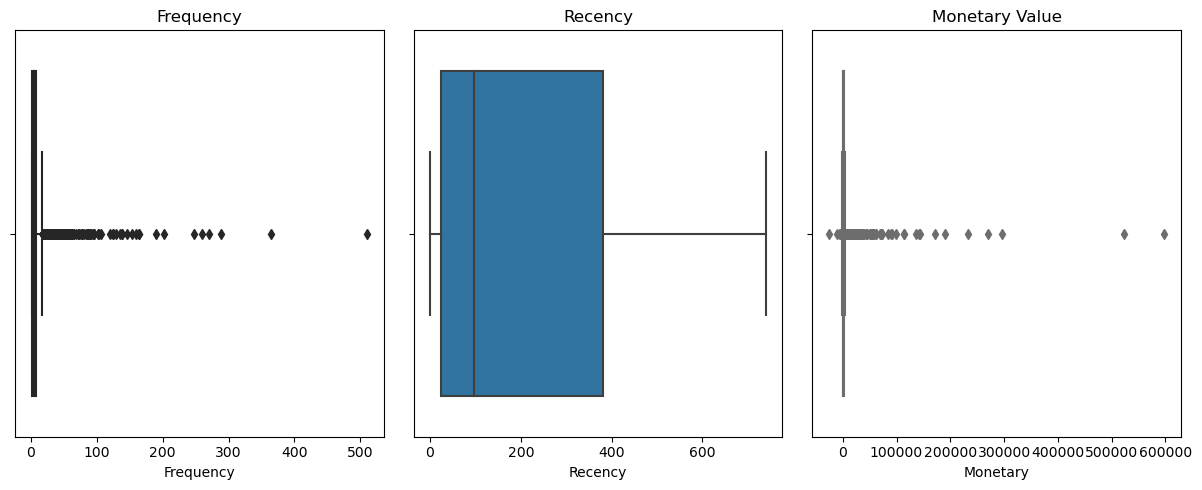

In [58]:
plt.figure(figsize=(16,5))
plt.subplot(141)
sns.boxplot(rfm["Frequency"], color = "olive")
plt.title("Frequency")
plt.subplot(142)
sns.boxplot(rfm["Recency"])
plt.title("Recency")
plt.subplot(143)
sns.boxplot(rfm["Monetary"], color = "salmon")
plt.title("Monetary Value")
plt.tight_layout()

In [59]:
rfm.describe()

Customer ID      Recency    Frequency       Monetary
count   5942.000000  5942.000000  5942.000000    5942.000000
mean   15316.500000   202.908617     7.552339    2801.799459
std     1715.451981   211.857936    15.972262   13973.922553
min    12346.000000     1.000000     1.000000  -25111.090000
25%    13831.250000    25.000000     2.000000     325.097500
50%    15316.500000    96.000000     4.000000     843.970000
75%    16801.750000   381.000000     8.000000    2182.005000
max    18287.000000   739.000000   510.000000  598215.220000

In [60]:
print("Total Number of Frequency with 0: %s" % (len(rfm[rfm["Frequency"] == 0])))
print("Total Number of Recency with 0: %s" % (len(rfm[rfm["Recency"] == 0])))
print("Total Number of Monetary Value with 0: %s" % (len(rfm[rfm["Monetary"] == 0])))

Total Number of Frequency with 0: 0
Total Number of Recency with 0: 0
Total Number of Monetary Value with 0: 15


Now we have the data related to the RFM, we can now start with which model we can build to predict our customer's lifetime value. First we have to figure out either we have to do the prediction based on the customer level or the aggregate level.

For this analysis I am using to predict the customer lifetime value on the customer level rather than the aggregate or a cohort level.

Before building the model, we have to understand few of the most important things. We have to understand the business context that is the type of customers (contractual or non-contractual) and their purchase opportunity (discrete or continuous). The combination of both defines the business context which going to affect our CLV estimation approach.

Basic Terms:

a) Contractual Customers - Contractual customers are subscription based customers. They churned on a defined date if they choose not to renew the subscription.

b) Non-Contractual Customers - Non Contractual customers generally exist in e-commerce or retail business where there's no defined time period when the customer is going to churn.

c) Continuous Purchase - It refers to the time period when the customer purchase a certain thing in any time period. Ex- Retail & E-commerce.

d) Discrete Purchase - It refers to the time period when the customer purchase a certain thing on a specific time period. Ex - Netflix, Hulu, Hotstar Subscription.

### Customer Segmentation Analysis

Segments Overview:
About to Sleep: Customers who haven’t purchased recently, buy infrequently, and spend moderately. They may need re-engagement strategies.

At Risk: These customers used to be active but haven’t purchased in a long time. They are at risk of being lost and may require win-back campaigns.

Can’t Lose Them: Highly valuable customers who are at risk of churning. Special attention is needed to retain them.

Champions: The most valuable customers who purchase frequently and spend the most. They should be rewarded and nurtured.

Hibernating: Customers who haven’t engaged for a long time, buy infrequently, and spend the least. Reactivation campaigns may be needed.

Loyal Customers: Regular purchasers who are loyal but do not spend as much as the champions. They should be acknowledged for their loyalty.

Need Attention: Customers who might be slipping away. They purchase occasionally and spend moderately. They need targeted marketing efforts.

New Customers: Recently acquired customers. It’s essential to convert them into loyal customers through effective onboarding.

Others: A diverse group of customers who don’t fit neatly into other categories. They require further analysis to understand their behavior.

Potential Loyalists: Customers with the potential to become loyal. They purchase frequently and spend a good amount. They need nurturing to become loyalists.

Promising: Recently active customers who show promise. They need encouragement to become more frequent purchasers.

In [61]:
rfm["recency_score"] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])

In [62]:
rfm["frequency_score"] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

In [63]:
rfm["monetary_score"] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [64]:
rfm.head()

Customer ID  Recency  Frequency  Monetary recency_score frequency_score  \
0      12346.0      326         17    -64.68             2               5   
1      12347.0        2          8   5633.32             5               4   
2      12348.0       75          5   2019.40             3               3   
3      12349.0       19          5   4404.54             4               3   
4      12350.0      310          1    334.40             2               1   

  monetary_score  
0              1  
1              5  
2              4  
3              5  
4              2

The priority order for metric importance in RFM Score calculation is as follows: frequency > recency > monetary. Consequently, we only need to consider 'recency' and 'frequency' in our analysis

In [66]:
rfm['RFM_Score'] = rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str) + rfm['monetary_score'].astype(str)

In [67]:
rfm.head()

Customer ID  Recency  Frequency  Monetary recency_score frequency_score  \
0      12346.0      326         17    -64.68             2               5   
1      12347.0        2          8   5633.32             5               4   
2      12348.0       75          5   2019.40             3               3   
3      12349.0       19          5   4404.54             4               3   
4      12350.0      310          1    334.40             2               1   

  monetary_score RFM_Score  
0              1       251  
1              5       545  
2              4       334  
3              5       435  
4              2       212

In [68]:
df = pd.DataFrame(rfm)

In [69]:
def rfm_segment(r, f, m):
    if r >= 4 and f >= 4 and m >= 4:
        return 'Champions'
    elif r >= 4 and f >= 4:
        return 'Loyal Customers'
    elif r >= 4 and f >= 3:
        return 'Potential Loyalists'
    elif r == 5 and f == 1:
        return 'New Customers'
    elif r == 4 and f == 2:
        return 'Promising'
    elif r in [2, 3] and f in [2, 3] and m <= 2:
        return 'Need Attention'
    elif r in [2, 3] and f <= 2:
        return 'About to Sleep'
    elif r == 1 and f in [2, 3]:
        return 'At Risk'
    elif r == 1 and f in [3, 4] and m >= 4:
        return 'Can’t Lose Them'
    elif r == 1 and f == 1:
        return 'Hibernating'
    else:
        return 'Others'

In [70]:
df['Segment'] = df.apply(lambda x: rfm_segment(x['recency_score'], x['frequency_score'], x['monetary_score']), axis=1)

In [71]:
df.head()

Customer ID  Recency  Frequency  Monetary recency_score frequency_score  \
0      12346.0      326         17    -64.68             2               5   
1      12347.0        2          8   5633.32             5               4   
2      12348.0       75          5   2019.40             3               3   
3      12349.0       19          5   4404.54             4               3   
4      12350.0      310          1    334.40             2               1   

  monetary_score RFM_Score              Segment  
0              1       251               Others  
1              5       545            Champions  
2              4       334               Others  
3              5       435  Potential Loyalists  
4              2       212       About to Sleep

In [72]:
df[["Segment","Recency","Frequency","Monetary"]].groupby("Segment").agg(["mean", "count"])

Recency        Frequency           Monetary      
                           mean count       mean count         mean count
Segment                                                                  
About to Sleep       238.044753   648   1.251543   648   522.660296   648
At Risk              534.747681   539   2.263451   539   505.893469   539
Can’t Lose Them      482.416667    48   6.958333    48  2793.566667    48
Champions             18.734303  1306  20.862175  1306  8960.081091  1306
Hibernating          580.573055   527   1.000000   527   217.857006   527
Loyal Customers       23.034884   172   6.488372   172   868.740297   172
Need Attention       243.250000   552   2.271739   552   324.581902   552
New Customers          9.428571    49   1.000000    49   369.995306    49
Others               171.405405  1480   6.999324  1480  2126.180553  1480
Potential Loyalists   24.614350   446   3.661435   446  1080.990897   446
Promising             35.771429   175   1.868571   175   631.844114   175

###  Why is this segmentation important?:
1. Customer Understanding: RFM segmentation helps companies gain a deeper understanding of their customer base. It allows businesses to categorize customers into different segments based on their recent purchase history, purchase frequency, and monetary value. This segmentation provides insights into customer behavior and preferences.

2. Targeted Marketing: RFM segments enable companies to create targeted marketing campaigns. By identifying high-value customers, at-risk customers, or loyal customers, companies can tailor their marketing efforts to specific customer groups. This leads to more effective and efficient marketing campaigns.

3. Customer Retention: RFM analysis helps in customer retention. By identifying and focusing on at-risk or lapsed customers (low recency and frequency), companies can implement strategies to re-engage these customers and prevent them from churning.

4. Cross-Selling and Up-Selling: Companies can use RFM segments to identify cross-selling and up-selling opportunities. For example, they can recommend complementary products to high-value customers to increase their monetary value.

### CLV Prediction

**Beta Geo - Negative Binomial Distribution + Gamma Gamma Distribution Model**

In [73]:
!pip install lifetimes

In [74]:
import lifetimes
from lifetimes import BetaGeoFitter
from lifetimes.plotting import plot_frequency_recency_matrix
from lifetimes.plotting import plot_probability_alive_matrix
from lifetimes.plotting import plot_period_transactions
from lifetimes.utils import calibration_and_holdout_data
from lifetimes.plotting import *

In [75]:
data.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  Total Amount  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom          83.4  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom          81.0  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom          81.0  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom         100.8  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom          30.0

In [76]:
summary = lifetimes.utils.summary_data_from_transaction_data(data, "Customer ID", "InvoiceDate", "Total Amount")

In [77]:
summary = summary.reset_index()

In [78]:
summary.shape

(5942, 5)

A) T - T is the length of the period of observation for the customer based on the value used for freq (the default is frequency is day). This can also be thought of the length of time between a customer’s first purchase and the end of the period, measured in increments defined by freq.

B) Recency - Recency is the point (relative to their own period of observation) at which the customer made their most recent repeat purchase. This can also be thought of the length of time between a customer’s first and last purchase for the period, measured in increments defined by freq.

C) Frequency - Frequency is the number of repeat purchases the customer made during the observation period.

D) Monetary - monetary_value is the average monetary amount of each repeat purchase made by a customer.

In [79]:
summary.head()

Customer ID  frequency  recency      T  monetary_value
0      12346.0       10.0    400.0  725.0      -15.468000
1      12347.0        7.0    402.0  404.0      717.398571
2      12348.0        4.0    363.0  438.0      449.310000
3      12349.0        4.0    717.0  735.0     1107.172500
4      12350.0        0.0      0.0  310.0        0.000000

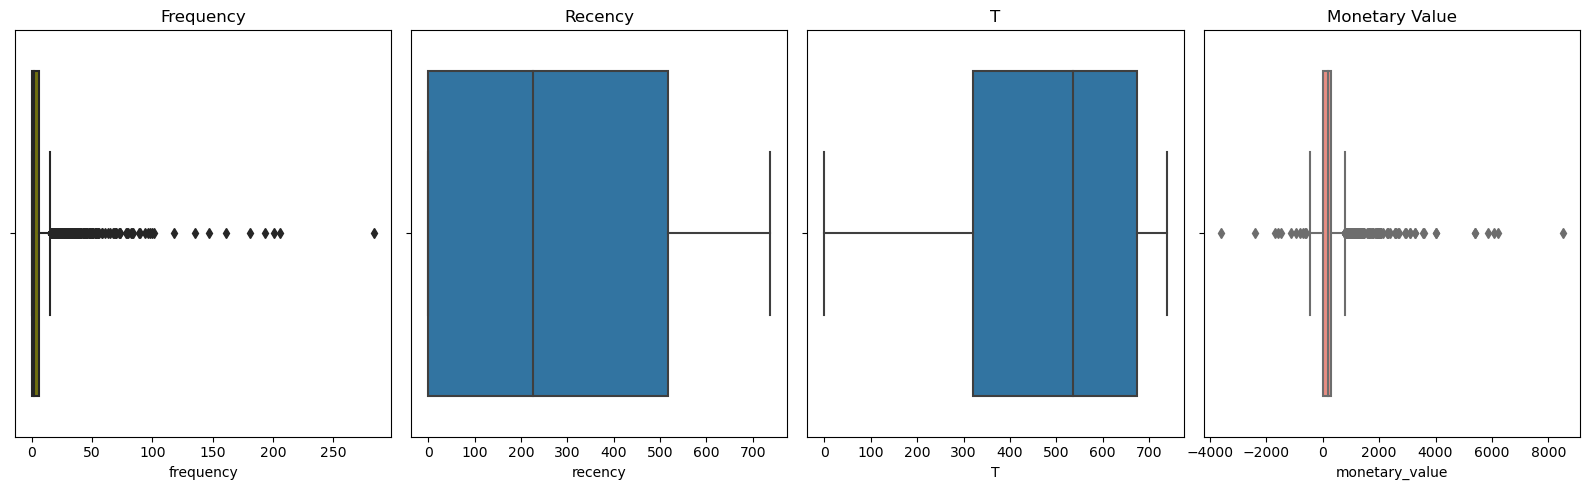

In [80]:
plt.figure(figsize=(16,5))
plt.subplot(141)
sns.boxplot(summary["frequency"], color = "olive")
plt.title("Frequency")
plt.subplot(142)
sns.boxplot(summary["recency"])
plt.title("Recency")
plt.subplot(143)
sns.boxplot(summary["T"])
plt.title("T")
plt.subplot(144)
sns.boxplot(summary["monetary_value"], color = "salmon")
plt.title("Monetary Value")
plt.tight_layout()

In [81]:
#checking for the values containing zero.

print("Total Number of Frequency with 0: %s" % (len(summary[summary["frequency"] == 0])))
print("Total Number of Recency with 0: %s" % (len(summary[summary["recency"] == 0])))
print("Total Number of Monetary Value with 0: %s" % (len(summary[summary["monetary_value"] == 0])))

Total Number of Frequency with 0: 1544
Total Number of Recency with 0: 1544
Total Number of Monetary Value with 0: 1547


Now we have the data related to the RFM, we can now start with which model we can build to predict our customer's lifetime value. First we have to figure out either we have to do the prediction based on the customer level or the aggregate level.

For this analysis I am using to predict the customer lifetime value on the customer level rather than the aggregate or a cohort level.

Before building the model, we have to understand few of the most important things. We have to understand the business context that is the type of customers (contractual or non-contractual) and their purchase opportunity (discrete or continuous). The combination of both defines the business context which going to affect our CLV estimation approach.

Basic Terms:

a) Contractual Customers - Contractual customers are subscription based customers. They churned on a defined date if they choose not to renew the subscription.

b) Non-Contractual Customers - Non Contractual customers generally exist in e-commerce or retail business where there's no defined time period when the customer is going to churn.

c) Continuous Purchase - It refers to the time period when the customer purchase a certain thing in any time period. Ex- Retail & E-commerce.

d) Discrete Purchase - It refers to the time period when the customer purchase a certain thing on a specific time period. Ex - Netflix, Hulu, Hotstar Subscription.

For this analysis we are going to use the non-contractual with continuous purchase opportunity and the best fitted models we are going to use will be BG-NBD Model, Pareto-NBD Model, Modifies BG Model along with Gamma Gamma Distribution model for estimating the expected monetary value as a part of the customer lifetime value prediction.

In [82]:
summary_bgf = summary.copy()

In [83]:
bgf = BetaGeoFitter(penalizer_coef = 0.0)

In [84]:
bgf.fit(summary_bgf["frequency"], summary_bgf["recency"], summary_bgf["T"])

<lifetimes.BetaGeoFitter: fitted with 5942 subjects, a: 0.15, alpha: 49.94, b: 2.11, r: 0.67>

In [85]:
bgf.summary

coef  se(coef)  lower 95% bound  upper 95% bound
r       0.668170  0.015453         0.637882         0.698458
alpha  49.943472  1.517728        46.968725        52.918220
a       0.145498  0.014512         0.117055         0.173941
b       2.112726  0.313787         1.497704         2.727749

In [86]:
t = 30
summary_bgf["predicted_purchases"] = bgf.conditional_expected_number_of_purchases_up_to_time(t, summary_bgf["frequency"], summary_bgf["recency"], summary_bgf["T"])

In [87]:
summary_bgf.sort_values(by = "predicted_purchases").tail(5)

Customer ID  frequency  recency      T  monetary_value  \
2260      14606.0      181.0    735.0  736.0      165.079448   
5495      17841.0      193.0    736.0  737.0      357.437461   
2965      15311.0      201.0    738.0  738.0      560.647015   
402       12748.0      206.0    735.0  735.0      241.501117   
2565      14911.0      284.0    737.0  738.0      948.996127   

      predicted_purchases  
2260             6.908522  
5495             7.355876  
2965             7.651860  
402              7.871598  
2565            10.800953

Based on the above analysis, above are the top customers who are likely to purchase in the next day.

<AxesSubplot:title={'center':'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

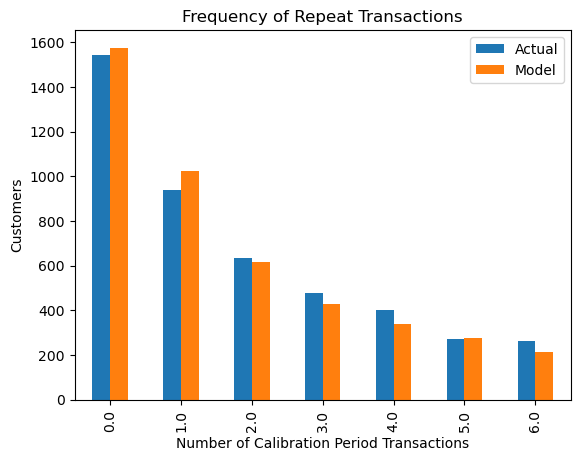

In [88]:
plot_period_transactions(bgf)

In [89]:
#dividing our dataset into training & holdout
summary_cal_holdout = calibration_and_holdout_data(data, "Customer ID", "InvoiceDate", 
                                                   calibration_period_end = '2011-06-08',
                                                  observation_period_end = '2011-12-09')

In [90]:
pd.DataFrame(summary_cal_holdout.head())

frequency_cal  recency_cal  T_cal  frequency_holdout  \
Customer ID                                                         
12346.0               10.0        400.0  541.0                0.0   
12347.0                3.0        158.0  220.0                4.0   
12348.0                3.0        190.0  254.0                1.0   
12349.0                3.0        328.0  551.0                1.0   
12350.0                0.0          0.0  126.0                0.0   

             duration_holdout  
Customer ID                    
12346.0                 184.0  
12347.0                 184.0  
12348.0                 184.0  
12349.0                 184.0  
12350.0                 184.0

In [91]:
bgf.fit(summary_cal_holdout["frequency_cal"],
       summary_cal_holdout["recency_cal"],
       summary_cal_holdout["T_cal"])

<lifetimes.BetaGeoFitter: fitted with 5025 subjects, a: 0.22, alpha: 49.70, b: 2.72, r: 0.67>

In [92]:
summary_cal_holdout

frequency_cal  recency_cal  T_cal  frequency_holdout  \
Customer ID                                                         
12346.0               10.0        400.0  541.0                0.0   
12347.0                3.0        158.0  220.0                4.0   
12348.0                3.0        190.0  254.0                1.0   
12349.0                3.0        328.0  551.0                1.0   
12350.0                0.0          0.0  126.0                0.0   
...                    ...          ...    ...                ...   
18283.0                9.0        458.0  474.0                9.0   
18284.0                1.0          2.0  247.0                0.0   
18285.0                0.0          0.0  476.0                0.0   
18286.0                2.0        247.0  539.0                0.0   
18287.0                4.0        537.0  554.0                2.0   

             duration_holdout  
Customer ID                    
12346.0                 184.0  
12347.0                 184.0  
12348.0                 184.0  
12349.0                 184.0  
12350.0                 184.0  
...                       ...  
18283.0                 184.0  
18284.0                 184.0  
18285.0                 184.0  
18286.0                 184.0  
18287.0                 184.0  

[5025 rows x 5 columns]

<AxesSubplot:title={'center':'Actual Purchases in Holdout Period vs Predicted Purchases'}, xlabel='Purchases in calibration period', ylabel='Average of Purchases in Holdout Period'>

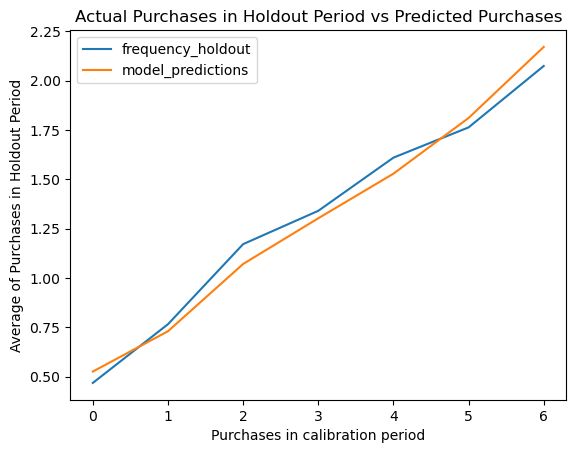

In [93]:
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout)

In [94]:
summary_cal_holdout.head()

frequency_cal  recency_cal  T_cal  frequency_holdout  \
Customer ID                                                         
12346.0               10.0        400.0  541.0                0.0   
12347.0                3.0        158.0  220.0                4.0   
12348.0                3.0        190.0  254.0                1.0   
12349.0                3.0        328.0  551.0                1.0   
12350.0                0.0          0.0  126.0                0.0   

             duration_holdout  
Customer ID                    
12346.0                 184.0  
12347.0                 184.0  
12348.0                 184.0  
12349.0                 184.0  
12350.0                 184.0

In [95]:
#Creating a function which can predict the future purchased value based on the lookup window

def bgf_get_pred_error(t, id_):
    
    individual = summary_bgf[summary_bgf["Customer ID"] == id_]
    
    ind_pred = bgf.predict(t, individual["frequency"], individual["recency"], individual["T"])
    
    actual_val = individual["frequency"]/individual["recency"]*t
    
    error = actual_val - ind_pred
    
    print("Your Predicted Purchase: %s" % (ind_pred))
    print("Your Actual Purchase: %s" % (actual_val))
    print("Prediction Error: %s" % (error))

In [96]:
summary_bgf["actual_30"] = summary_bgf["frequency"]/summary_bgf["recency"]*30

In [97]:
summary_bgf.head()

Customer ID  frequency  recency      T  monetary_value  \
0      12346.0       10.0    400.0  725.0      -15.468000   
1      12347.0        7.0    402.0  404.0      717.398571   
2      12348.0        4.0    363.0  438.0      449.310000   
3      12349.0        4.0    717.0  735.0     1107.172500   
4      12350.0        0.0      0.0  310.0        0.000000   

   predicted_purchases  actual_30  
0             0.077362   0.750000  
1             0.495352   0.522388  
2             0.269178   0.330579  
3             0.172500   0.167364  
4             0.055446        NaN

In [98]:
 #filling null values with 0
summary_bgf = summary_bgf.fillna(value = 0)

In [99]:
summary_bgf.head()

Customer ID  frequency  recency      T  monetary_value  \
0      12346.0       10.0    400.0  725.0      -15.468000   
1      12347.0        7.0    402.0  404.0      717.398571   
2      12348.0        4.0    363.0  438.0      449.310000   
3      12349.0        4.0    717.0  735.0     1107.172500   
4      12350.0        0.0      0.0  310.0        0.000000   

   predicted_purchases  actual_30  
0             0.077362   0.750000  
1             0.495352   0.522388  
2             0.269178   0.330579  
3             0.172500   0.167364  
4             0.055446   0.000000

In [100]:
#calculating the prediction error for the 30 days purchase prediction
summary_bgf["Error"] = summary_bgf["actual_30"] - summary_bgf["predicted_purchases"]

In [101]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from lifetimes import ParetoNBDFitter
from lifetimes.plotting import plot_history_alive
import pickle
from lifetimes import ModifiedBetaGeoFitter
import warnings

In [102]:
mse = mean_squared_error(summary_bgf["actual_30"],summary_bgf["predicted_purchases"])

In [103]:
print("Mean Squared Error: %s" % mse)
print("Average Error:  %s" % summary_bgf["Error"].mean())
print("Root Mean Squared Error: %s" % sqrt(mse))

Mean Squared Error: 4.337882659974867
Average Error:  0.4117976553678267
Root Mean Squared Error: 2.082758425736136


In [104]:
#Purchase Prediction

bgf_mse_purchase = mean_squared_error(summary_bgf["actual_30"],summary_bgf["predicted_purchases"])
bgf_rmse_purchase_30 = sqrt(bgf_mse_purchase)
bgf_avg_error_purchase_30 = summary_bgf["Error"].mean()

In [105]:
summary_bgf.head()

Customer ID  frequency  recency      T  monetary_value  \
0      12346.0       10.0    400.0  725.0      -15.468000   
1      12347.0        7.0    402.0  404.0      717.398571   
2      12348.0        4.0    363.0  438.0      449.310000   
3      12349.0        4.0    717.0  735.0     1107.172500   
4      12350.0        0.0      0.0  310.0        0.000000   

   predicted_purchases  actual_30     Error  
0             0.077362   0.750000  0.672638  
1             0.495352   0.522388  0.027036  
2             0.269178   0.330579  0.061401  
3             0.172500   0.167364 -0.005136  
4             0.055446   0.000000 -0.055446

In [106]:
#Filtering the data where we have the values of 0 or less than 0.
res_summary = summary_bgf[summary_bgf["frequency"] > 0]

In [107]:
final_summary = res_summary[res_summary["monetary_value"] > 0]

To proceed with the Gamma Gamma Model we have to check for the assumption whether the frequency and monetary values are intercorrelated or not. As we can see here, the correlation between the frequency and monetary value is pretty low so we can go ahead to build Gamma Gamma Model.

In [108]:
ggf = lifetimes.GammaGammaFitter(penalizer_coef = 0.0)

In [109]:
ggf.fit(final_summary["frequency"], final_summary["monetary_value"])

<lifetimes.GammaGammaFitter: fitted with 4185 subjects, p: 1.37, q: 3.86, v: 696.90>

In [110]:
ggf.summary

coef   se(coef)  lower 95% bound  upper 95% bound
p    1.374683   0.058567         1.259892         1.489475
q    3.864415   0.134545         3.600708         4.128123
v  696.904781  50.767856       597.399783       796.409779

In [111]:
summary_bgf.head(2)

Customer ID  frequency  recency      T  monetary_value  \
0      12346.0       10.0    400.0  725.0      -15.468000   
1      12347.0        7.0    402.0  404.0      717.398571   

   predicted_purchases  actual_30     Error  
0             0.077362   0.750000  0.672638  
1             0.495352   0.522388  0.027036

In [112]:
summary_ = summary_bgf[(summary_bgf["monetary_value"] > 0) & (summary_bgf["frequency"] > 0)]

In [113]:
summary_.shape

(4185, 8)

In [114]:
summary_["Expected_Avg_Sales"] = ggf.conditional_expected_average_profit(summary_["frequency"], 
                                                                        summary_["monetary_value"])

In [115]:
summary_.head()

Customer ID  frequency  recency      T  monetary_value  \
1      12347.0        7.0    402.0  404.0      717.398571   
2      12348.0        4.0    363.0  438.0      449.310000   
3      12349.0        4.0    717.0  735.0     1107.172500   
6      12352.0        8.0    356.0  392.0      218.182500   
7      12353.0        1.0    204.0  408.0       89.000000   

   predicted_purchases  actual_30     Error  Expected_Avg_Sales  
1             0.495352   0.522388  0.027036          629.556290  
2             0.269178   0.330579  0.061401          409.972301  
3             0.172500   0.167364 -0.005136          842.513995  
6             0.566836   0.674157  0.107321          242.209404  
7             0.091934   0.147059  0.055125          254.858476

In [116]:

print("Expected Average Sales: %s" % summary_["Expected_Avg_Sales"].mean())
print("Actual Average Sales: %s" % summary_["monetary_value"].mean())
print("Difference: %s" % (summary_["monetary_value"].mean() - summary_["Expected_Avg_Sales"].mean()))
print("Mean Squared Error: %s" % mean_squared_error(summary_["monetary_value"], summary_["Expected_Avg_Sales"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(summary_["monetary_value"], summary_["Expected_Avg_Sales"])))

Expected Average Sales: 340.1889755829274
Actual Average Sales: 330.66084951982555
Difference: -9.528126063101865
Mean Squared Error: 20896.88188078991
Root Mean Squared Error: 144.55753830495976


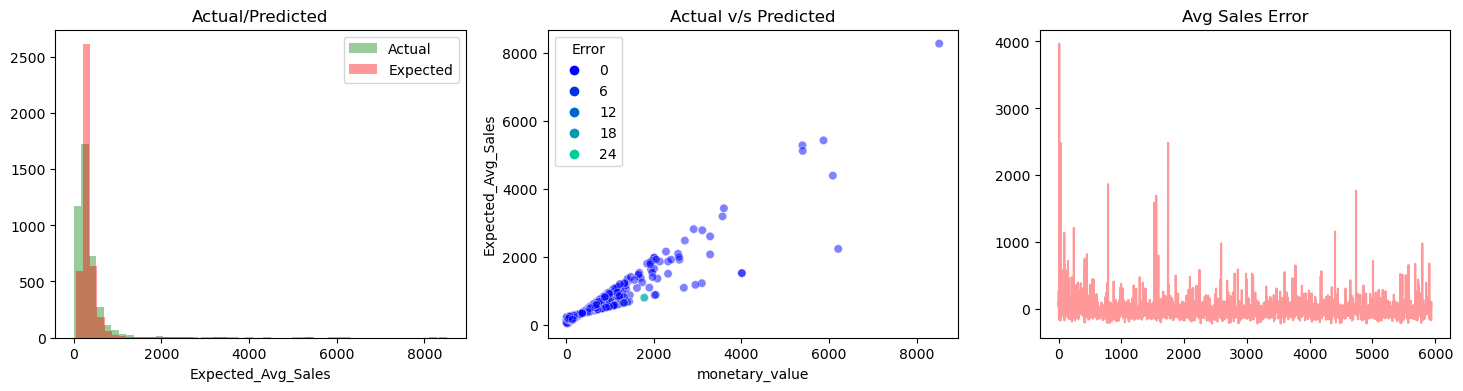

In [117]:
plt.figure(figsize=(18,4))
plt.subplot(131)
sns.distplot(summary_["monetary_value"], color = "g", kde = False)
sns.distplot(summary_["Expected_Avg_Sales"], color = "r", kde = False)
plt.title("Actual/Predicted")
plt.legend(["Actual", "Expected"])
plt.subplot(132)
sns.scatterplot(summary_["monetary_value"], summary_["Expected_Avg_Sales"], alpha = 0.5, hue = summary_["Error"], palette = "winter")
plt.title("Actual v/s Predicted")
plt.subplot(133)
plt.plot(summary_["monetary_value"]-summary_["Expected_Avg_Sales"], color = 'r', alpha = 0.4)
plt.title("Avg Sales Error")
plt.show()

In [118]:
summary_["predicted_clv"] = ggf.customer_lifetime_value(bgf,
                                                       summary_["frequency"],
                                                       summary_["recency"],
                                                       summary_["T"],
                                                       summary_["monetary_value"],
                                                       time = 30,
                                                       freq = 'D',
                                                       discount_rate = 0.01)

In [119]:
summary_.head()

Customer ID  frequency  recency      T  monetary_value  \
1      12347.0        7.0    402.0  404.0      717.398571   
2      12348.0        4.0    363.0  438.0      449.310000   
3      12349.0        4.0    717.0  735.0     1107.172500   
6      12352.0        8.0    356.0  392.0      218.182500   
7      12353.0        1.0    204.0  408.0       89.000000   

   predicted_purchases  actual_30     Error  Expected_Avg_Sales  predicted_clv  
1             0.495352   0.522388  0.027036          629.556290    7110.166375  
2             0.269178   0.330579  0.061401          409.972301    2512.081673  
3             0.172500   0.167364 -0.005136          842.513995    3449.798774  
6             0.566836   0.674157  0.107321          242.209404    3100.010138  
7             0.091934   0.147059  0.055125          254.858476     536.035114

In [120]:
#manual calculation of CLV
#summary_["predicted_purchases"] * summary_["Expected_Avg_Sales"]

In [121]:
#adding a 5% of profit margin
summary_["CLV"] = summary_["predicted_clv"]*0.05

In [122]:
summary_[summary_["Customer ID"] == 13902.0]

Customer ID  frequency  recency      T  monetary_value  \
1556      13902.0        5.0     99.0  731.0        6085.692   

      predicted_purchases  actual_30     Error  Expected_Avg_Sales  \
1556             0.000758   1.515152  1.514393         4393.947298   

      predicted_clv       CLV  
1556      56.677321  2.833866

In [123]:
summary_.sort_values(by = "Error", ascending = False)

Customer ID  frequency  recency      T  monetary_value  \
5276      17622.0        2.0      2.0  598.0         194.145   
3448      15794.0        1.0      1.0  737.0         102.000   
2884      15230.0        1.0      1.0  240.0          59.400   
5045      17391.0        1.0      1.0  164.0         101.760   
2446      14792.0        1.0      1.0   64.0           6.200   
...           ...        ...      ...    ...             ...   
1677      14023.0        1.0    243.0  250.0         310.930   
4149      16495.0        1.0    273.0  276.0         437.900   
2174      14520.0        1.0    289.0  290.0         105.600   
4904      17250.0        1.0    258.0  261.0         221.870   
1058      13404.0        1.0    211.0  212.0          34.680   

      predicted_purchases  actual_30      Error  Expected_Avg_Sales  \
5276             0.003059  30.000000  29.996941          265.738713   
3448             0.008321  30.000000  29.991679          259.074204   
2884             0.076162  30.000000  29.923838          245.259590   
5045             0.132262  30.000000  29.867738          258.996375   
2446             0.342512  30.000000  29.657488          228.007537   
...                   ...        ...        ...                 ...   
1677             0.154797   0.123457  -0.031340          326.827426   
4149             0.142739   0.109890  -0.032849          368.002110   
2174             0.136983   0.103806  -0.033177          260.241636   
4904             0.149580   0.116279  -0.033301          297.946452   
1058             0.177494   0.142180  -0.035314          237.243222   

      predicted_clv        CLV  
5276      14.937363   0.746868  
3448      44.309988   2.215499  
2884     381.340230  19.067012  
5045     696.754608  34.837730  
2446    1549.261568  77.463078  
...             ...        ...  
1677    1139.053953  56.952698  
4149    1191.242796  59.562140  
2174     811.317591  40.565880  
4904    1006.736400  50.336820  
1058     937.220109  46.861005  

[4185 rows x 11 columns]

In [124]:
actual = summary_["monetary_value"]*summary_["actual_30"]

In [125]:
pred = summary_["Expected_Avg_Sales"]*summary_["predicted_purchases"]

In [126]:
error = actual - pred

In [127]:
result = pd.DataFrame([actual, pred, error], index = ["Actual", "Predicted", "Error"]).T

In [128]:
print("Average Error: %s" % result["Error"].mean())
print("Mean Squared Error: %s" % mean_squared_error(result["Actual"], result["Predicted"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(result["Actual"], result["Predicted"])))

Average Error: 108.19828103163479
Mean Squared Error: 907287.253481
Root Mean Squared Error: 952.5162746541395


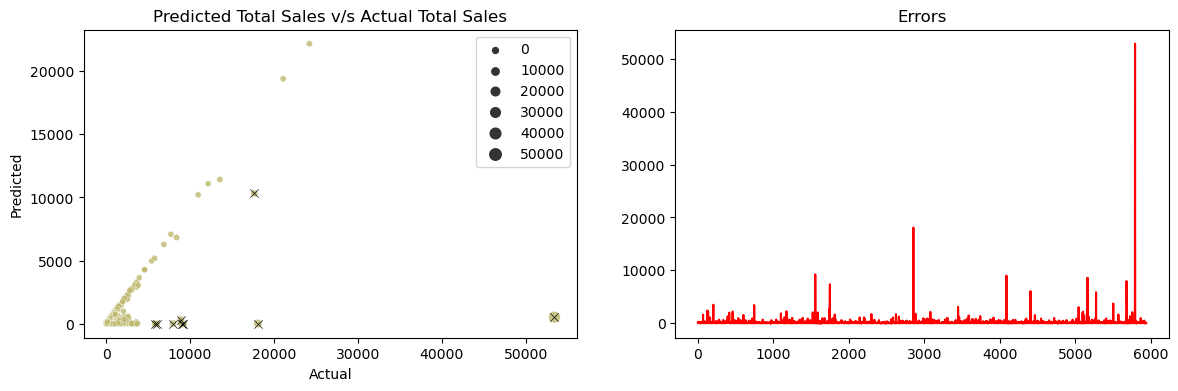

In [129]:
#Predicted v/s Actual
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.scatterplot(result["Actual"], result["Predicted"], size = result["Error"], color = "darkkhaki", alpha = 0.8, marker = 'o')
sns.scatterplot((result[result["Error"] > 5000]["Actual"]), (result[result["Error"] > 5000]["Predicted"]), color = "k", marker = "x")
plt.title("Predicted Total Sales v/s Actual Total Sales")
plt.subplot(122)
plt.plot(result["Error"], color = "r")
plt.title("Errors")
plt.show()

In [130]:
predicted_clv_results = pd.DataFrame(summary_[["Customer ID", "predicted_clv"]])

In [131]:
predicted_clv_results

Customer ID  predicted_clv
1         12347.0    7110.166375
2         12348.0    2512.081673
3         12349.0    3449.798774
6         12352.0    3100.010138
7         12353.0     536.035114
...           ...            ...
5935      18281.0     421.725814
5936      18282.0    1709.150147
5937      18283.0    3051.679784
5940      18286.0     490.633249
5941      18287.0    3511.932539

[4185 rows x 2 columns]

In [132]:
predicted_clv_results.columns = ["Customer ID", "BG-NBD"]

In [133]:
predicted_clv_results

Customer ID       BG-NBD
1         12347.0  7110.166375
2         12348.0  2512.081673
3         12349.0  3449.798774
6         12352.0  3100.010138
7         12353.0   536.035114
...           ...          ...
5935      18281.0   421.725814
5936      18282.0  1709.150147
5937      18283.0  3051.679784
5940      18286.0   490.633249
5941      18287.0  3511.932539

[4185 rows x 2 columns]

In [187]:
indexes = ["MSE Purchase Error", "RMSE Purchase Error","Avg Purchase Error"]
data = [[bgf_mse_purchase],[bgf_rmse_purchase_30],[bgf_avg_error_purchase_30]]

In [189]:
model_purchase_result = pd.DataFrame(data, columns = ["BG-NBD"], index = indexes)

In [190]:
model_purchase_result

BG-NBD
MSE Purchase Error   4.337883
RMSE Purchase Error  2.082758
Avg Purchase Error   0.411798